In [102]:
import model, BeamFeatures
import torch
import matplotlib.pyplot as plt, numpy as np
# m = model.GNNModel(outdim=4, edge_input=8, node_input=4)
m = model.GNNModel()
checkpoint = torch.load('test_ints.cpt')
m.load_state_dict(checkpoint['model_state_dict'])
# bf = BeamFeatures.BeamFeatures('/home/jake/GNN_work/data/1_9_23_pdgs/merged_val.h5', style='pdgs', ave_charge=True)
bf = BeamFeatures.BeamFeatures('/home/jake/GNN_work/data/1_9_23_pdgs/merged_val.h5', style='interaction')

In [2]:
import numpy as np

In [48]:
def plot_scatter3d(voxels, labels={}, edge_index=None, clust_labels=None, markersize=5, colorscale=None):
    
    import copy
    import plotly.graph_objects as go # Plotly graph objects
    from plotly.offline import iplot  # Interactive plots
    import plotly.express as px # For discrete color scale
    
    if colorscale is None:
        colorscale = px.colors.qualitative.Dark24

    # Initialize a graph with no labels
    blank = go.Scatter3d(x = voxels[:,0],
                         y = voxels[:,1],
                         z = voxels[:,2],
                         mode = 'markers', 
                         marker = dict(
                             size = 2, 
                             colorscale = colorscale
                         )
                        )
    
    # Loop over the set of labels, make a graph for each
    #graphs = []
    graphs = [blank]
#     for key, label in labels.items():
#         graph = copy.copy(blank)
#         graph['name'] = key
#         graph['marker']['color'] = label
#         graph['hovertext'] = [f'{l:0.0f}' for l in label]
#         graphs.append(graph)
        
#     if not len(graphs):
#         graphs.append(blank)
        
    # Draw edges if requested
#     if edge_index is not None:
#         import scipy as sp
#         edge_vertices = []
#         clust_labels = np.unique(clust_labels, return_inverse=True)[1]
#         for i, j in edge_index:
#             vi, vj = voxels[clust_labels==i], voxels[clust_labels==j]
#             d12 = sp.spatial.distance.cdist(vi, vj, 'euclidean')
#             i1, i2 = np.unravel_index(np.argmin(d12), d12.shape)
#             edge_vertices.append([vi[i1], vj[i2], [None, None, None]])

#         edge_vertices = np.concatenate(edge_vertices)

#         graphs.append(go.Scatter3d(x = edge_vertices[:,0], y = edge_vertices[:,1], z = edge_vertices[:,2],
#                                    mode = 'lines',
#                                    name = 'Predicted edges',
#                                    line = dict(
#                                         width = 2,
#                                         color = 'Blue'
#                                     ),
#                                     hoverinfo = 'none'))

    iplot(graphs)

In [118]:
data = bf[5]

In [119]:
data.y

tensor([[0., 0., 0., 0., 0., 0.]])

In [52]:
plot_scatter3d(data.x.reshape(-1,3))

In [40]:
from torch_geometric.loader import DataLoader
loader = DataLoader(bf,
                    shuffle     = True,
                    num_workers = 0,
                    batch_size  = 64
                    )

In [8]:
# data = next(iter(loader))


In [9]:
import numpy as np

In [10]:
from train import get_confusion

In [43]:
get_confusion?

In [113]:
conf = np.zeros((6,6))

In [104]:
data = next(iter(loader))

In [105]:
x = m(data, data.batch)

In [110]:
x

tensor([[9.9956e-01, 8.9310e-05, 5.8569e-05, 3.2136e-05, 1.2433e-04, 1.3648e-04],
        [9.9956e-01, 1.0018e-04, 6.4160e-05, 3.3629e-05, 1.4611e-04, 9.5171e-05],
        [9.9971e-01, 4.7387e-05, 3.6272e-05, 2.0043e-05, 7.2051e-05, 1.1182e-04],
        [8.4242e-15, 1.6091e-01, 8.3320e-01, 4.1459e-03, 2.1482e-04, 1.5274e-03],
        [9.9971e-01, 5.7466e-05, 4.2554e-05, 2.5387e-05, 7.5603e-05, 9.1841e-05],
        [9.9966e-01, 7.5208e-05, 5.9031e-05, 2.7244e-05, 6.8821e-05, 1.1214e-04],
        [5.8970e-17, 1.4322e-04, 5.3743e-04, 9.9368e-01, 4.9117e-03, 7.2558e-04],
        [9.9969e-01, 4.4868e-05, 4.0405e-05, 3.0804e-05, 8.4509e-05, 1.1418e-04],
        [9.9963e-01, 5.5097e-05, 5.0091e-05, 3.4102e-05, 1.0011e-04, 1.2605e-04],
        [9.9972e-01, 4.2536e-05, 3.4403e-05, 2.8052e-05, 7.5459e-05, 1.0312e-04],
        [9.9969e-01, 1.0454e-04, 6.0566e-05, 1.7893e-05, 6.0637e-05, 6.7249e-05],
        [3.1692e-01, 4.2194e-01, 2.1228e-01, 8.3721e-03, 2.2611e-02, 1.7877e-02],
        [9.3105e

In [88]:
# shower_scores = np.array([])

In [114]:

for data in loader:
    x = m(data, data.batch)
#     shower_scores = np.concatenate((shower_scores, x[:,0].detach().numpy()))
    conf += get_confusion(data, x, n=6)

(array([1.798e+03, 4.500e+01, 2.600e+01, 1.000e+01, 9.000e+00, 9.000e+00,
        1.100e+01, 1.200e+01, 7.000e+00, 5.000e+00, 6.000e+00, 4.000e+00,
        6.000e+00, 4.000e+00, 3.000e+00, 4.000e+00, 2.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00, 2.000e+00, 4.000e+00,
        2.000e+00, 2.000e+00, 6.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 3.000e+00, 2.000e+00,
        2.000e+00, 1.000e+00, 3.000e+00, 4.000e+00, 0.000e+00, 3.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 3.000e+00, 1.000e+00,
        2.000e+00, 3.000e+00, 4.000e+00, 0.000e+00, 1.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 4.000e+00, 0.000e+00, 1.000e+00, 2.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 3.000e+00, 2.000e+00, 2.000e+00,
        0.000e+00, 2.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 0.000e+00,
        3.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 3.000e+00,
        1.000e+00, 2.000e+00, 1.000e+0

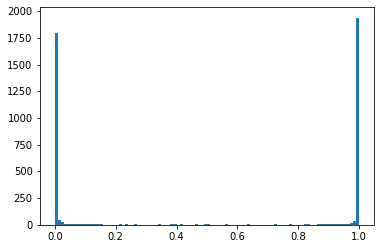

In [95]:
plt.hist(shower_scores, bins=np.arange(0., 1.01, .01))

In [116]:
new_conf = conf

In [115]:
conf

array([[2.095e+03, 1.194e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [4.000e+00, 7.600e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [6.000e+00, 3.530e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [9.000e+00, 3.870e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [1.000e+00, 1.200e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00]])

In [108]:
for i in range(len(new_conf)):
    print(np.sum(new_conf[i,:]))
    new_conf[i,:] /= np.sum(new_conf[i,:])

3292.0
79.0
374.0
381.0
11.0
0.0


/tmp/ipykernel_16596/869954307.py:3: RuntimeWarning:

invalid value encountered in divide



array([[2.095e+03, 1.194e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [4.000e+00, 7.600e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [6.000e+00, 3.530e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [9.000e+00, 3.870e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [1.000e+00, 1.200e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00]])

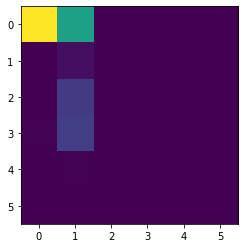

In [117]:
plt.imshow(new_conf)
new_conf

In [97]:
import h5py as h5
f = h5.File('try_ints.h5', 'r')



In [98]:
nbatches = int(f['losses'].shape[0])

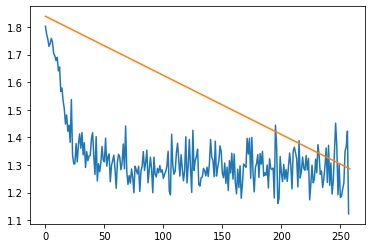

In [99]:
plt.plot(f['losses'][:])
plt.plot([0] + [(i+1)*nbatches for i in range(1)], f['test_ave_losses'][:])

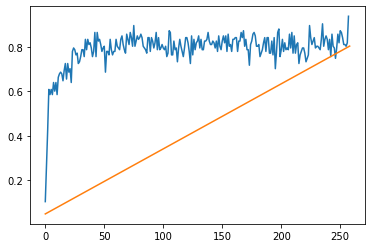

In [100]:
plt.plot(f['accuracies'][:])
plt.plot([0] + [(i+1)*nbatches for i in range(1)], f['test_accuracies'][:])

In [ ]:
f['test_accuracies'][-1]

In [96]:
f.close()

In [ ]:
f

In [ ]:
f1

In [ ]:
f2